In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# This example is from chapter 7.4 in Lay's Linear Algebra Text
A = np.array([[4,11,14],[8,7,-2]])

In [3]:
# Make data
u = np.array([np.linspace(0, 2 * np.pi, 1000)])
v = np.linspace(0, np.pi, 1000)
X = 1 * np.outer(np.cos(u), np.sin(v))
Y = 1 * np.outer(np.sin(u), np.sin(v))
Z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

In [4]:
sphere_array = np.array([X.reshape(1000**2),Y.reshape(1000**2),Z.reshape(1000**2)])
image_array = A@sphere_array


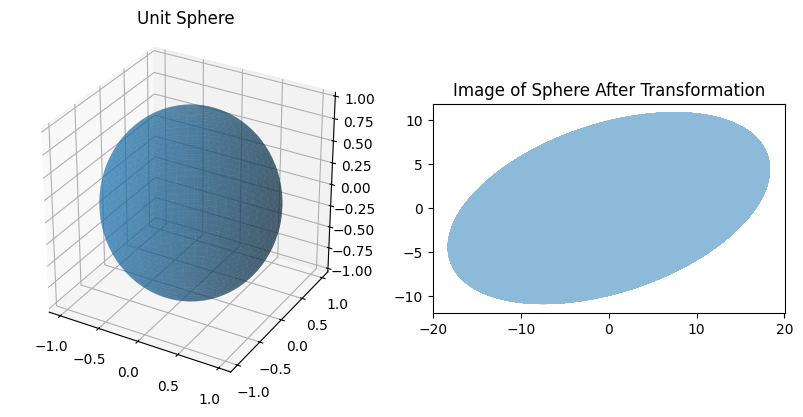

In [48]:
figure1 = plt.figure(figsize=(10,5))

# add axes to the figure
axis11 = figure1.add_subplot(121,projection='3d')
axis12 = figure1.add_subplot(122)

# set aspect ratios
axis11.set_aspect('equal')
axis12.set_aspect('equal')

# set titles
axis11.set_title("Unit Sphere")
axis12.set_title("Image of Sphere After Transformation")

# add images to the axes
axis11.plot_surface(X,Y,Z,alpha=0.5)
axis12.plot(image_array[0],image_array[1],alpha=0.5);

In [28]:
# calculate A^tA, a symmetric matrix
B = A.transpose()@A
B_eigvals, B_eigvecs = la.eig(B)

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667,  0.66666667, -0.33333333],
       [-0.66666667, -0.33333333,  0.66666667]])

In [7]:
image_vecs = [None]*3
for i in range(3):
    image_vecs[i] = np.array([A@B_eigvecs[i]]).transpose()
    print(A@B_eigvecs[i])

[-18.  -6.]
[-4.99600361e-15  3.33066907e-16]
[ 3. -9.]


In [8]:
image_data = image_vecs[0]@np.cos(u)+image_vecs[2]@np.sin(u)

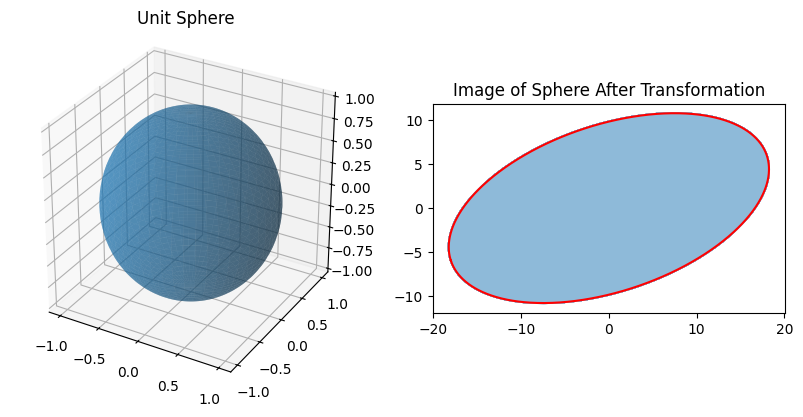

In [49]:
axis12.plot(image_data[0],image_data[1],'r');
figure1

In [11]:
figure1.savefig("projection_before_and_after.png")

In [12]:
sp.Matrix(A)

Matrix([
[4, 11, 14],
[8,  7, -2]])

In [14]:
sp.latex(sp.Matrix(A))

'\\left[\\begin{matrix}4 & 11 & 14\\\\8 & 7 & -2\\end{matrix}\\right]'

In [15]:
def matrix_to_latex(M):
    return sp.latex(sp.Matrix(M))

In [17]:
print(matrix_to_latex(A))

\left[\begin{matrix}4 & 11 & 14\\8 & 7 & -2\end{matrix}\right]


In [18]:
print(matrix_to_latex(B))

\left[\begin{matrix}80 & 100 & 40\\100 & 170 & 140\\40 & 140 & 200\end{matrix}\right]


In [23]:
B_eigvecs.round(2)

array([[-0.33, -0.67, -0.67],
       [-0.67,  0.67, -0.33],
       [-0.67, -0.33,  0.67]])

In [24]:
B_eigvals

array([ 3.60000000e+02, -3.71123759e-15,  9.00000000e+01])

In [25]:
A@B_eigvecs

array([[-1.80000000e+01, -2.66453526e-15,  3.00000000e+00],
       [-6.00000000e+00,  0.00000000e+00, -9.00000000e+00]])

In [27]:
B_eigvecs

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667,  0.66666667, -0.33333333],
       [-0.66666667, -0.33333333,  0.66666667]])

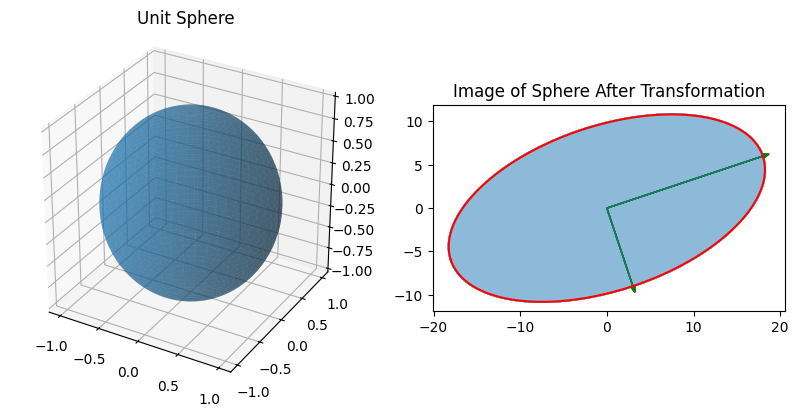

In [53]:
axis12.arrow(0,0,18,6,color='g',head_width=0.5)
axis12.arrow(0,0,3,-9,color='g',head_width=0.5)
figure1

In [54]:
figure1.savefig("projection_with_vectors.png")

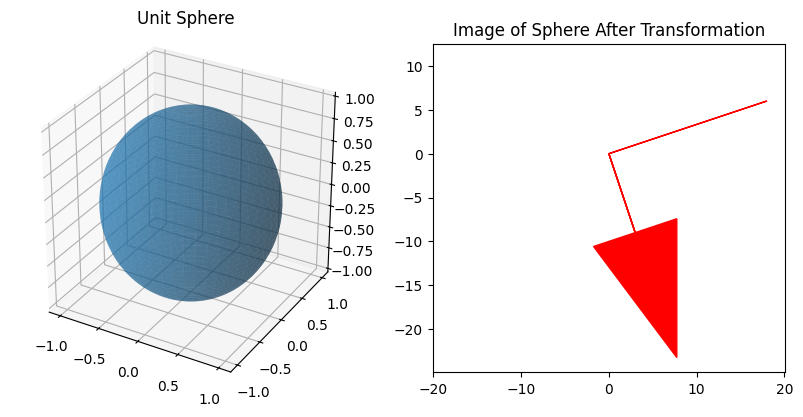

In [47]:
figure1